In [256]:
#coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import random 
from sklearn import datasets 

In [257]:
# 1. 数据预处理

def getTrainSet():
    
    iris = datasets.load_iris() 
    data = iris.data[:, :4]         #取特征空间中的4个维度(纯数据)
    
    return data

data = getTrainSet()

In [258]:
def vec_adjust(avg, data):
    
    # 2-考察样本，划分
    # 计算均值向量
    cluster = []
    for n in range(len(avg)):
        cluster.append([])
    for d in data:                #数据集中任一[5.8, 2.7, 5.1, 1.9]
        distance_list = []
        for a in avg:         #均值向量集任一[5.8, 2.7, 5.1, 1.9]
            sum = 0
            for i in range(len(d)):
                sum +=(d[i]- a[i]) ** 2
            distance = sum ** 0.5
            distance_list.append(distance)
        min_distance = min(distance_list)                           #最小距离
        min_index = distance_list.index(min(distance_list))         #簇的下标
        #print(distance_list, ' ', min_distance,'[',min_index, ']')
        cluster[min_index].append(list(d))

    # 3-测算新的均值向量
    tmp_cluster = []
    for n in range(len(avg)):
        tmp_cluster.append([])
    for c in cluster:
        for i in range(len(d)):
            tmp_cluster[cluster.index(c)].append(np.sum(row[i] for row in c)/len(c))  #按位求均值存入
    
    return tmp_cluster
    

In [259]:
# 均值向量列表
tmp_cluster = KMeans(data, 3)
#print(tmp_cluster)

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


In [260]:
# 2. k-means聚类器实现
def KMeans(data, k):

    # 1-随机选择k个作为初始均值向量
    avg = []
    index = random.sample(range(0,150),k)
    for i in range(k):
        avg.append(list(data[index[i]]))
    tmp_cluster = vec_adjust(avg, data)

    # 4-迭代，直到k值不变
    while tmp_cluster != avg:
        avg = tmp_cluster.copy()
        tmp_cluster = vec_adjust(avg, data)
    #print(tmp_cluster)

    return tmp_cluster

In [261]:
# 3. 获取预测标签下标列表
def get_label_pred(avg, data):
    
    label_pred = []
    for d in data:                #数据集中任一[5.8, 2.7, 5.1, 1.9]
        distance_list = []
        for a in avg:         #均值向量集任一[5.8, 2.7, 5.1, 1.9]
            sum = 0
            for i in range(len(d)):
                sum +=(d[i]- a[i]) ** 2
            distance = sum ** 0.5
            distance_list.append(distance)
        min_distance = min(distance_list)                           #最小距离
        min_index = distance_list.index(min(distance_list))         #簇的下标
        label_pred.append(min_index)
    
    return label_pred

In [262]:
# 预测下标列表
label_pred = get_label_pred(tmp_cluster, data)
label_pred_array = np.array(label_pred)

In [263]:
# 5. 计算平均平方误差（MSE）
def calculateMSE(d, a):
    total = ((d[0]-a[0])**2) +((d[1]-a[1])**2)+ ((d[2]-a[2])**2) +((d[3]-a[3])**2)
    return total

# 计算平均平方误差
total = 0
for d,i in zip(data,label_pred):
    total += calculateMSE(d,tmp_cluster[i])
print(total/len(data))

0.5257044388398483


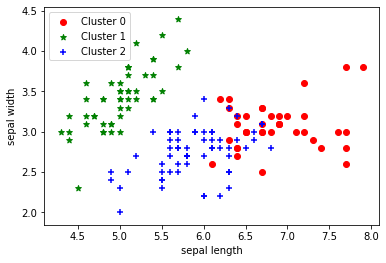

In [264]:
# 4. 绘制k-means结果
x0 = data[label_pred_array == 0]
x1 = data[label_pred_array == 1]
x2 = data[label_pred_array == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='Cluster 0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='Cluster 1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='Cluster 2')  

plt.xlabel('sepal length')  
plt.ylabel('sepal width')  
plt.legend(loc=2)  
plt.show()  